# Pothole Detection and Marking

This is an initial attempt at detecting potholes in a given frame using contours and bounding box technique, using the `opencv` library for Python.

In [2]:
import cv2
import matplotlib.pyplot as plt

First we load and convert the image to grayscale, and make a few copies.

In [3]:
image = cv2.imread("./data/test/pothole.jpeg")

new_image = image.copy()
bound_img = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

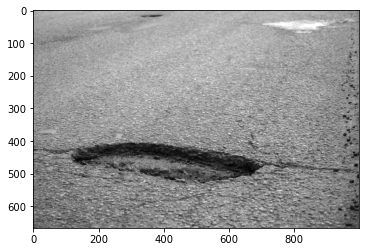

In [4]:
plt.imshow(gray, cmap='gray')

Then we calculate a binary image based on a threshold value. The value can be fine-tuned to the desired effect. A good starting point is at 100 for the threshold (2nd parameter), and then adjusting it as necessary.

In [5]:
ret, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

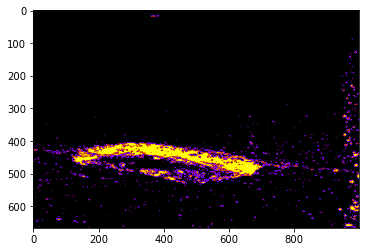

In [6]:
plt.imshow(binary, cmap='gnuplot_r')

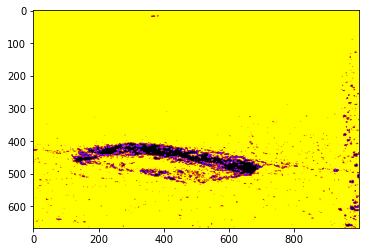

In [7]:
plt.imshow(~binary, cmap='gnuplot_r')

Next, we find all the contours identified by `opencv` in our binary image, and plot them on the image.

In [8]:
contours, heir = cv2.findContours(
    binary,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE
)

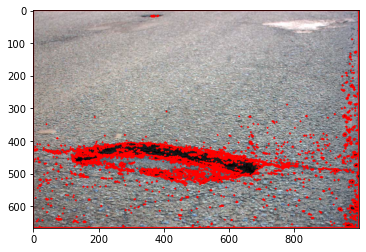

In [9]:
with_cntrs = cv2.drawContours(
    image,
    contours,
    -1,
    (255, 0, 0),
    3
)

plt.imshow(with_cntrs)

In [10]:
print(f"Total number of contours detected : {len(contours)}")

Total number of contours detected : 1340


Finally, we plot the bounding box on the image corresponding to the contours we found. Note here, that we are only drawing those bounding boxes where the countour area is more than a 100 unit sq. This keeps the clutter to a minimum and identifies the object.

In [11]:
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    if cv2.contourArea(c) > 100:
        cv2.rectangle(bound_img, (x, y), (x + w, y + h), (255, 0, 0), 5)

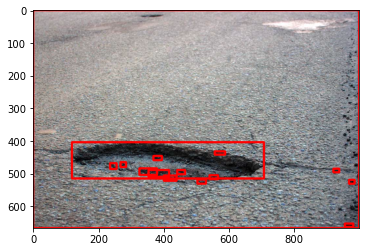

In [12]:
plt.imshow(bound_img)